<a href="https://colab.research.google.com/github/lineyumi/sigmoidal_data_science/blob/master/toronto_airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Airbnb Data Analysis - Toronto**
*by [Aline Yumi](https://www.linkedin.com/in/alineuezono/)*


---
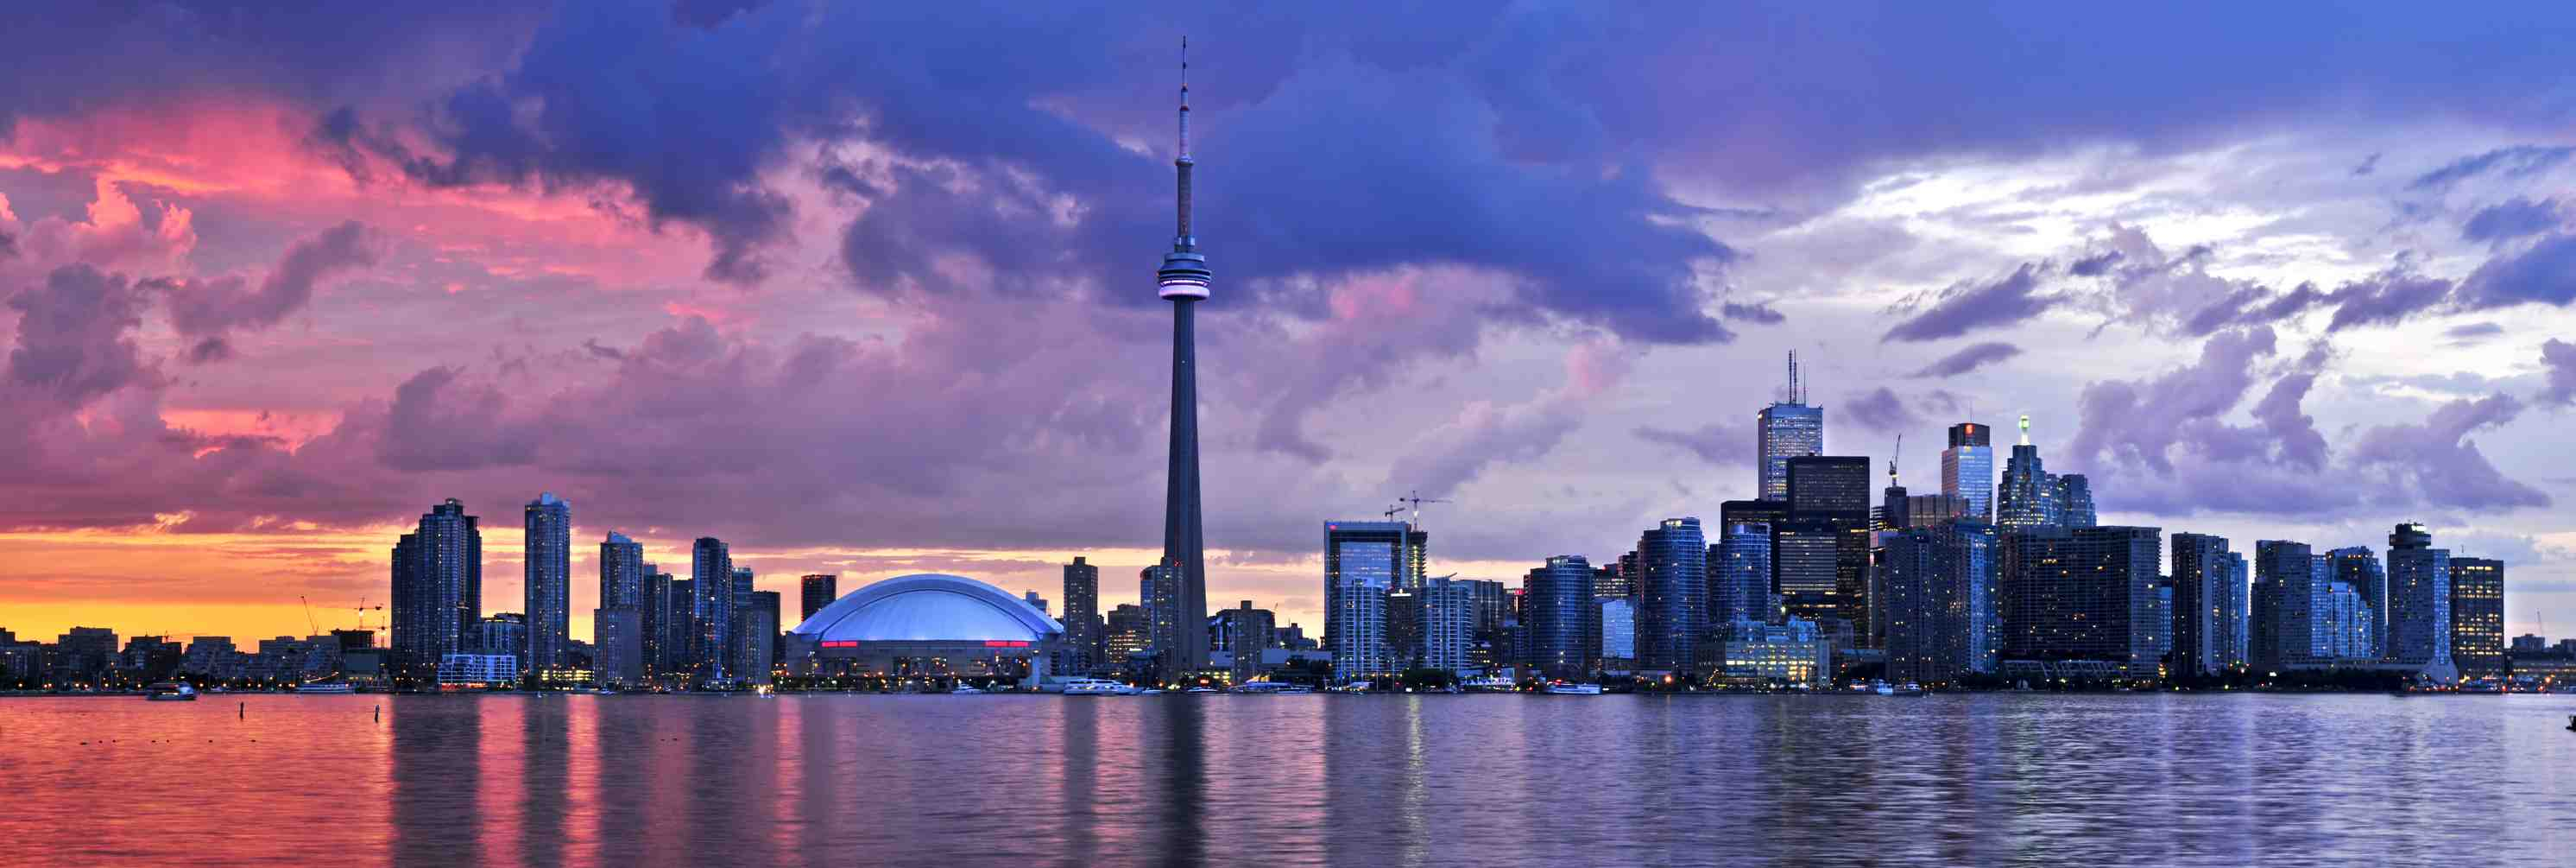
[Airbnb](https://www.airbnb.com.br/) began in 2008 when two designers who had space to share hosted three travelers looking for a place to stay. Now, millions of hosts and travelers choose to create a free Airbnb account so they can list their space and book unique accommodations anywhere in the world. And Airbnb experience hosts share their passions and interests with both travelers and locals.
  
Airbnb is considered the largest hotel company today, although the company does not own any of the real estate!

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**`In this notebook we will analyse Airbnb data on listings in Toronto and see some insights that can be extracted
`.**


# Data collection

The data from Toronto was sourced from the [Inside Airbnb](http://insideairbnb.com/get-the-data.html) in April, 2021.

In this post, we will perform an exploratory analysis from this dataset:

* `listings.csv` - *Summary information and metrics for listings in Rio de Janeiro (good for visualisations).*

Let’s start by importing the libraries and reading the dataset:


In [55]:
#importing libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [3]:
#importing dataset 
df = pd.read_csv("http://data.insideairbnb.com/canada/on/toronto/2021-02-08/visualisations/listings.csv")

# Data analysis
This step aims to create an initial awareness and allow an understanding of how the data is structured.


## How many listings and features? 
There are about 15,832 airbnb listings and each of these listing has associated with it 16 features



In [4]:
print("Listings:\t {}".format(df.shape[0]))
print("Features:\t {}\n".format(df.shape[1]))

Listings:	 15832
Features:	 16



## How the data types are distributed? 


In [5]:
display(df.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

##Dealing with missing values
It is important to understand whether these null values ​​are significant compared to the total entries. The quality of a dataset is directly related to the amount of missing values


* You can see that the `neighborhood_group` column has 100% of its missing values.
* `reviews_per_month` and` last_review` variables have null values ​​in almost 24% of the lines.



In [ ]:
# sort the features in descending order by their missing values
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.232377
last_review                       0.232377
host_name                         0.001011
name                              0.000063
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

## Making histogram


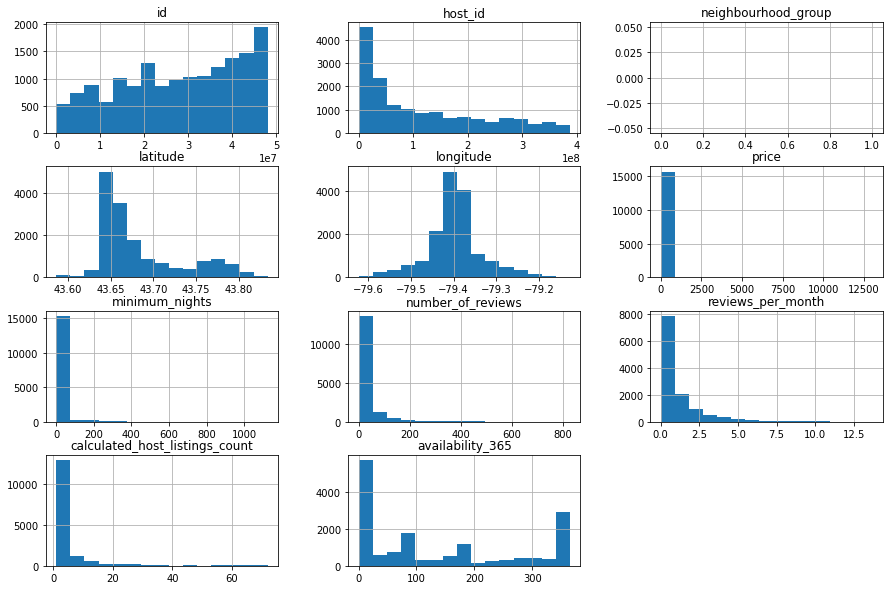

In [52]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

After a preliminary analysis, we noticed that some variables were oddly distributed, showing evidence of the presence of outliers, distorting our data.

##Dealing with outliers
Data that differs dramatically from all others is an outlier, your value escapes normality and probably will cause anomalies in the results.
Let’s explore 2 common ways to detect anomalies:
* statistical summary of numerical variables
* boxplots

In [6]:
#statistical summary of numerical variables
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,15832.000000,15832.000000,15832.000000,12153.000000,15832.000000,15832.000000
mean,136.679573,28.243115,26.784992,1.083136,5.076049,136.665045
std,316.199774,37.578259,54.284943,1.453023,10.102808,139.811901
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,60.000000,28.000000,1.000000,0.180000,1.000000,0.000000
50%,93.000000,28.000000,6.000000,0.520000,1.000000,89.000000
75%,148.000000,28.000000,27.000000,1.360000,4.000000,270.000000
max,13000.000000,1125.000000,828.000000,13.670000,72.000000,365.000000


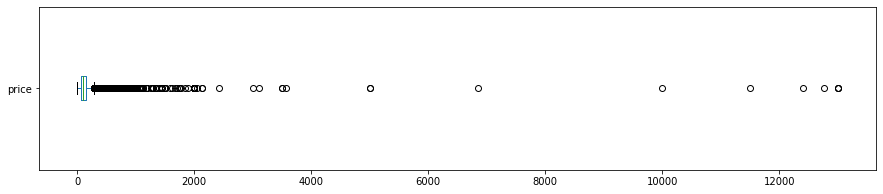


price: values ​​above 1500
68 entries
0.4295%


In [9]:
#boxplot for price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# see amount of values ​​above 1500
print("\nprice: values ​​above 1500")
print("{} entries".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

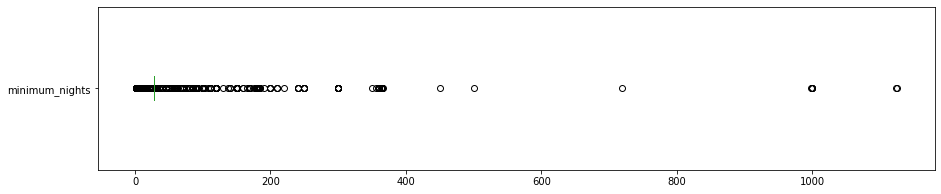

minimum_nights: values ​​above 30 days:
698 entries
4.4088%


In [20]:
# boxplot for minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# see amount of values ​​above 30 days 
print("minimum_nights: values ​​above 30 days:")
print("{} entries".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))


As we can see,

* price variable has 75% of the value below 148, but its maximum value is 13000, and minimum is 0 (for free?)

* minimum_nights has 75% of the value below 30 days, as well as there is minimum number of nights over 365 days a year.

## Data cleaning 


In [23]:
# removing outliers and creating a new dataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# removing `neighbourhood_group`, as it is empty
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

After cleaning our dataset and dealing with the outliers, let’s see a histogram of the distribution of each numeric variable, without anomalies in the results


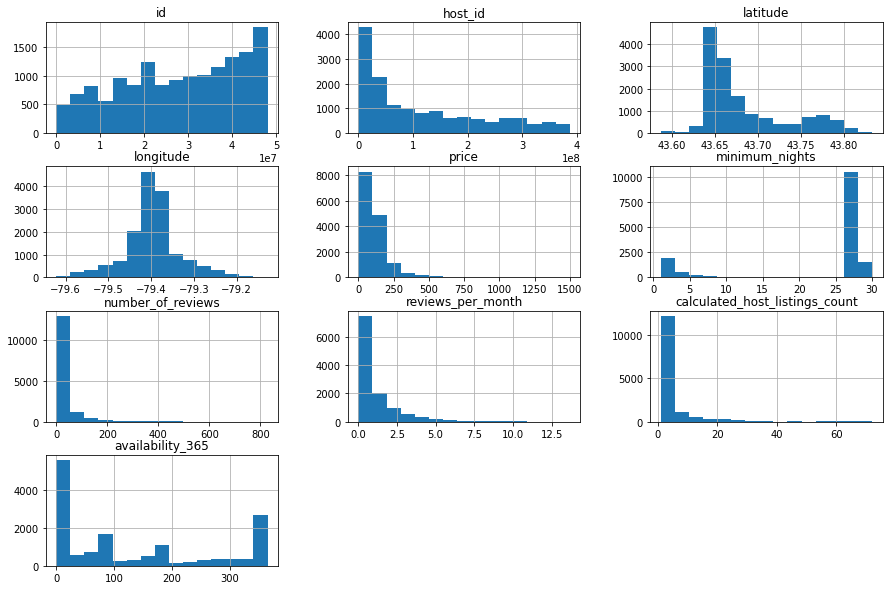

In [24]:
# making a histogram 
df_clean.hist(bins=15, figsize=(15,10));

##Which type of place is the most rented in Airbnb?


In [25]:
# show the quantity of each type of place available
df_clean.room_type.value_counts()

Entire home/apt    9522
Private room       5264
Shared room         243
Hotel room           49
Name: room_type, dtype: int64

In [27]:
# show the percentage of each type of place available
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.631516
Private room       0.349118
Shared room        0.016116
Hotel room         0.003250
Name: room_type, dtype: float64

As we can observe, entire homes are the majority of places available for rent in Toronto, they represent 63% of the total.


##What is the most expensive location in Toronto


In [33]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]


neighbourhood
Kingsway South                       194.400000
Rosedale-Moore Park                  189.361702
Yonge-St.Clair                       189.078431
Lawrence Park South                  187.341463
Forest Hill South                    183.478261
Leaside-Bennington                   172.555556
Waterfront Communities-The Island    169.212471
Markland Wood                        165.500000
St.Andrew-Windfields                 164.128205
Niagara                              155.738255
Name: price, dtype: float64

In [54]:
print(df_clean[df_clean.neighbourhood == "Kingsway South"].shape)


(10, 15)


Some neighborhoods in the top 10 above do not have a high number of sample, for example, Kingsway South has only 10 places, which represents a very low percentage of the total sample.

Let's then make a top 10 of the neighborhoods with the largest sampling.




In [36]:
df_clean.neighbourhood.value_counts() / df_clean.shape[0]

Waterfront Communities-The Island    0.172304
Niagara                              0.039528
Church-Yonge Corridor                0.033028
Annex                                0.032763
Bay Street Corridor                  0.029381
                                       ...   
Beechborough-Greenbrook              0.000663
Kingsway South                       0.000663
Thistletown-Beaumond Heights         0.000663
Markland Wood                        0.000663
Rustic                               0.000133
Name: neighbourhood, Length: 140, dtype: float64

As for the correlation between the numeric variables,we can see that Waterfront Communities-The Island is the most expensive location in Toronto.


## Making Scatter plot

Let’s display a scatter plot showing the properties distributions and the prices around Toronto.


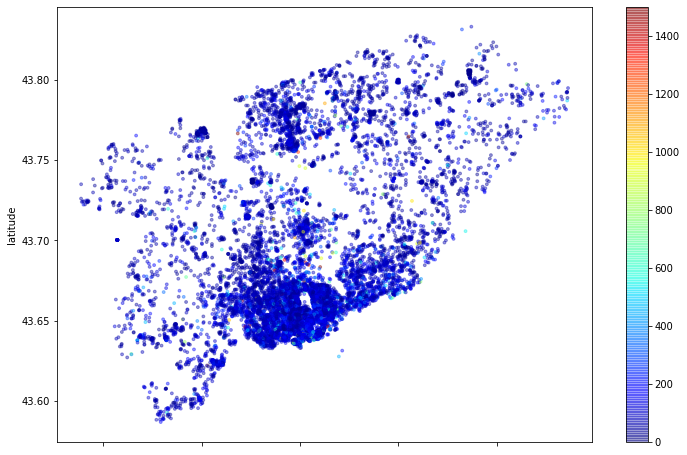

In [51]:
# plotting places by latitude-longitude-price
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

#Conclusion

Only a superficial analysis was made in this summarized Airbnb dataset (16 attributes), for a deeper analysis there is a dataset at [Inside Airbnb](http://insideairbnb.com/get-the-data.html) with over a hundred attributes. 
But it has already been returned that there are outliers in some of the variables and it was also noted that in some locations there are few properties available, which can distort the information of some attributes. This shows that data science requires a balance between technique and strategic thinking, the ability to understand the relationship of data!

